# Principal Component Analysis
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.

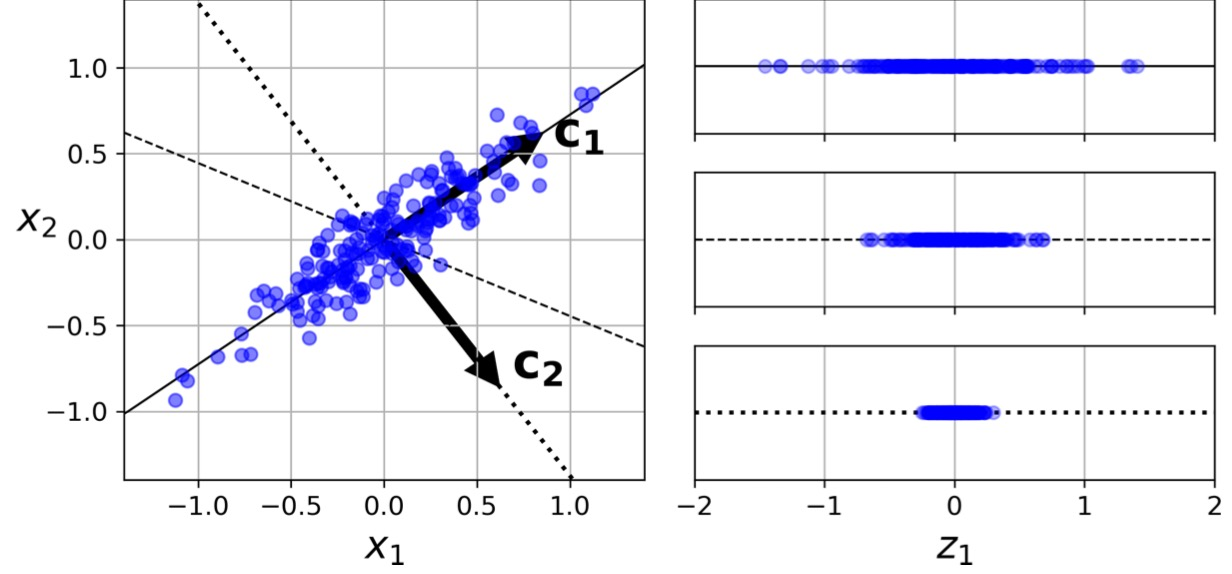

PCA identifies the axis that accounts for the largest amount of variance in the train‐ ing set. In Figure, it is the solid line. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.

### Principal components matrix

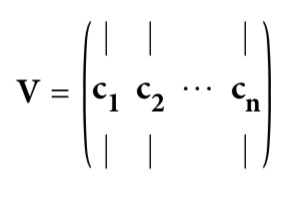

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
#read data
df = pd.read_csv ('gd.csv')

predictor = df['predictor']
outcome = df['outcome']

In [78]:
print(df.keys())

Index(['predictor', 'outcome'], dtype='object')


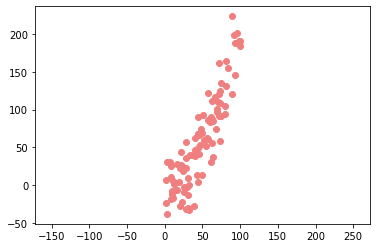

In [79]:
plt.scatter(predictor, outcome, c = 'lightcoral')
plt.axis('equal')
plt.savefig('before_decorrelation.jpg')
plt.show()

In [80]:
from sklearn.decomposition import PCA
import numpy as np

### 1. Decorrelation

You observed in the previous exercise that the predictor and outcome measurements of the dataset are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

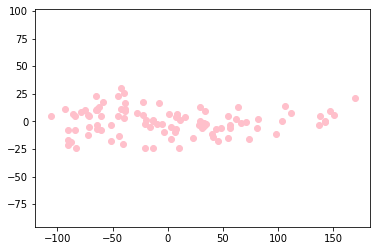

In [91]:
model = PCA()
df = np.array(df)
pca_features = model.fit_transform(df)
 
#deleting

xs = pca_features[:,0]

ys = pca_features[:,1]
 
plt.scatter(xs, ys,c = 'pink')
plt.axis('equal')
plt.savefig('decorrelation.jpg')
plt.show()

After applying Decorrelation,

correlation_before = 0.8843728968351913

correlation_after = 2.7755575615628914e-17

In [82]:
from scipy.stats import pearsonr
 
correlation_before, pvalue_before = pearsonr(predictor, outcome)
print(correlation_before)
 
correlation_after, pvalue_after = pearsonr(xs, ys)
print(correlation_after)

0.8843728968351913
2.7755575615628914e-17


### 2. Intrinsic dimension
Intrinsic dimension:

    Intrinsic dimension = number of features needed to approximate the dataset
    
    Essential idea behind dimension reduction
    
    What is the most compact representation of the samples?
    
    Can be detected with PCA
    
PCA identifies intrinsic dimension:

    Scatter plots work only if samples have 2 or 3 features
    
    PCA identifies intrinsic dimension when samples have any number of features
    
    Intrinsic dimension = number of PCA features with signficant variance


#### The first principal component: 
    
    The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

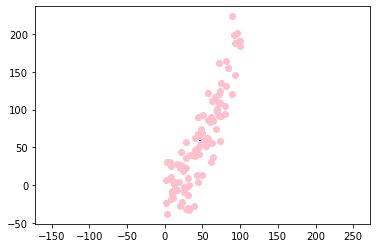

In [84]:
mean = model.mean_

first_pc = model.components_[0,:]

plt.scatter(predictor, outcome, c = 'pink')
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='blue', width=0.01)
plt.axis('equal')
plt.savefig('the first principal component.jpg')
plt.show()

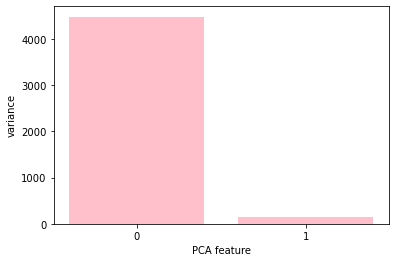

In [85]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_, color = 'pink')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.savefig('Variance of the PCA features.jpg')
plt.show()

In [86]:
model = PCA(n_components=2)

### Dimension reduction with PCA

Dimension reduction:

    Represent same data, using less features
    
    Important part of machine-learning pipelines
    
    Can be performed using PCA
    
Dimension reduction with PCA:
    
    PCA features are in decreasing order of variance
    
    Assumes the low variance features are "noise", and high variance features are informative
    
    Specify how many features to keep
    
    Intrinsic dimension is a good choice
    
Word frequency arrays:

    Rows represent documents, columns represent words
    
    Entries measure presence of each word in each document, measure using "tf-idf"